In [1]:
from IPython.core.display import HTML
def css_styling():
    sheet = '../css/custom.css'
    styles = open(sheet, "r").read() 
    return HTML(styles)
css_styling()

# Python OOP 1: Basics and Initialisation

This exercise is designed to motivate the use of object oriented programming in scientific computation via a simplified case using images. Your task is to program the Python `classes` which reads in the data from a file, manipulates the data and plots the image.


In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
%matplotlib inline

## Portable Greymap ( `.pgm`) Format

You have been provided with some image files i.e. `img1, .. img4` in the `data` directory in *portable greymap* (.pgm) format. Although admittedly a primitive image format, `.pgm` files are simple to manipulate as they contain only one pixel grey value per $x, y$ pixel in the image: the scale runs from 0 (black) to 255 (white). This represents a common task in scientific computing where you must read in some field data on a grid of points. **You are provided with the code to read and reshape this data from a file!**

Here's a demonstration of a greymap image that might be stored in `.pgm` format using a simple gradient of white to black - it is displayed here using a contour plot:

[[ 255.          253.20422535  251.4084507  ...,  131.0915493   129.29577465
   127.5       ]
 [ 253.20422535  251.4084507   249.61267606 ...,  129.29577465  127.5
   125.70422535]
 [ 251.4084507   249.61267606  247.81690141 ...,  127.5         125.70422535
   123.9084507 ]
 ..., 
 [ 131.0915493   129.29577465  127.5        ...,    7.18309859
     5.38732394    3.5915493 ]
 [ 129.29577465  127.5         125.70422535 ...,    5.38732394    3.5915493
     1.79577465]
 [ 127.5         125.70422535  123.9084507  ...,    3.5915493     1.79577465
     0.        ]]


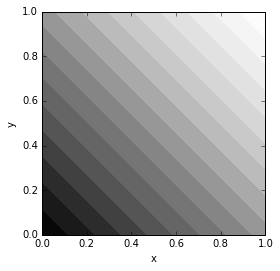

In [3]:
Nx = 72
Ny = 72
img_x = np.linspace(1, 0, Nx)
img_y = np.linspace(1, 0, Ny)
X, Y = np.meshgrid(img_x, img_y)

# Generate the gradient image - this could be stored in .pgm format!
img_z = (X+Y) * 255*0.5
print(img_z)


fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.contourf(img_x, img_y, img_z, 20, cmap=cm.Greys_r)
ax.set_xlabel('x')
ax.set_ylabel('y')

## Task breakdown

Create a `SquareImage` class which reads (portable greymap, '.pgm') image data from a file. The class should implement the following:


1. The Initialiser method `__init__(self, ...)`, which takes a string `filename` as an argument and
    - stores $Nx$ and $Ny$ as *instance attributes*, both equal to 72 (this isn't robust, but simplifies the exercise)
    
    - calculates and stores $x$ and $y$ as *instance attrbutes*. These are again the regularly spaced pixel $x$ and $y$ values from 1 to 0 (image colour values in pgm files start from top right pixel) - use linspace from 1 to 0 with $Nx$ and $Ny$ points respectively
    
    - Read and store image grey levels in `filename` as an *instance attribute*, $z$. The line for extracting this data from the files is the same as before,
    >`np.loadtxt(filename, skiprows=4).reshape(self.Nx, self.Ny)`

2. An `add_image` method which takes an `image` argument, and adds the z component of image to `self.z`
    - don't forget to add `self` as the first argument! Instance methods require us to be specific

3. A `plot` method which takes no extra arguments, and plots the current instance attributes $z$ as a contour vs $x$ and $y$ (also instance attributes). As this exercise is not testing your matplotlib, we provide the code for the function here:

    > `fig = plt.figure()
    > ax = fig.add_subplot(111, aspect='equal')
    > ax.contourf(self.x, self.y, self.z, cmap=cm.Greys_r)
    > plt.show()`


In [4]:
# Implement the class here:

class SquareImage(object):
    
    def __init__(self, filename=None):
        # To simplify this exercise, set the size of the image to a constant
        # (Each image was specifically written to have size 72 by 72)
        self.Nx = self.Ny = 72
        
        self.x = np.linspace(1, 0, self.Nx)
        self.y = np.linspace(1, 0, self.Ny)

        if filename is None:
            self.z = np.zeros([self.Nx, self.Ny])
        else:
            self.z = np.loadtxt(filename, skiprows=4).reshape(self.Nx, self.Ny)
    
    def add_image(self, image):
        """Add the z values of another 72 by 72 image image to this instance"""
        # Could add a defensive check here 
        assert(np.shape(image.z) == (self.Nx, self.Ny)), 'Image sizes are not equal!'
        
        # Add the image z value to self:
        self.z += image.z

    def plot(self):
        """Plots the contour z against x and y coordinates"""
        fig = plt.figure()
        ax = fig.add_subplot(111, aspect='equal')
        ax.contourf(self.x, self.y, self.z, cmap=cm.Greys_r)
        plt.show()

In [5]:
# The image file names
names = ['img1.pgm', 'img2.pgm', 'img3.pgm', 'img4.pgm']
files = [os.path.join('data', name) for name in names]

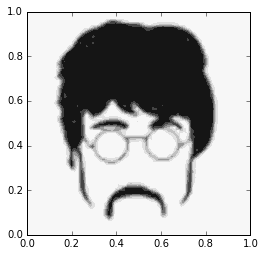

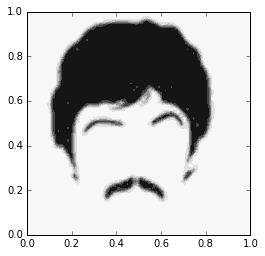

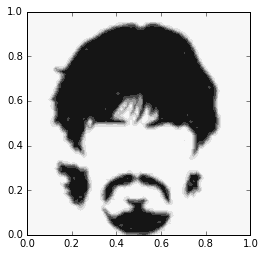

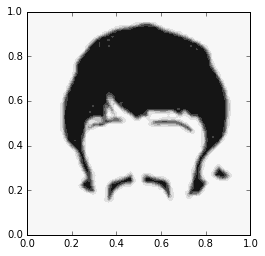

In [6]:
# Instantiate the class and plot each picture. 
imgs = []
for f in files:
    image = SquareImage(f)
    print(image)
    imgs.append(image)           # objects are first class instances: add to a list
    image.plot()
    

## Extension

Now that we can read in image data from a file, extend your `SquareImages` class above so that if the filename is `None` (python keyword), we store the $z$ attribute as `np.zeros([Nx, Ny])`.

* This will require an if statement, e.g.:
    > `if filename is None`
    >     store z as zeros
    > `else`
    >     read and store z data
    
* The default `filename` argument should be `None`, so that SquareImage() produces an 'empty' image.

In [7]:
# Create an 'empty' SquareImage 
combined = SquareImage()
print(combined.z)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


Now use the `add_image` method of the empty image to add on the contents of all other image in the list of `imgs`

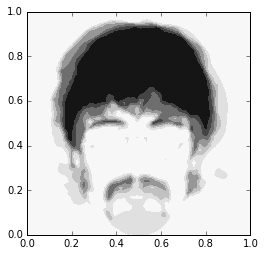

In [8]:
# Loop over the list of images
for image in imgs:
    combined.add_image(image)

# Plot
combined.plot()